In [40]:
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [41]:
data = json.load(open('bitcointalk_1.json'))

In [42]:
data

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [43]:
type(data)

dict

In [44]:
len(data['posts'])

36

In [45]:
test = data['posts'][0]['content']

In [46]:
x=[]
num_replies = len(data['posts'][0]['replies'])
for i in range(0,num_replies):
    x.append(data['posts'][0]['replies'][i]['content'])

In [47]:
type(data['posts'][0]['content'])

str

In [48]:
import re
temp=(re.sub(r'\s+', ' ', data['posts'][0]['content']))

In [49]:
temp

'Why is it smart to invest in Bitcoin? '

In [50]:
text=[]
text.append(data['posts'][0]['content'])
text.append(data['posts'][0]['replies'][0]['content'])
len(text)

2

In [51]:
len(data['posts'][4])

5

In [52]:
date=[]
text=[]
for i in range(0,len(data['posts'])):
    temp=(re.sub(r'\s+', ' ', data['posts'][i]['content']))
    text.append(temp)
    date.append(data['posts'][i]['date'])
    num_replies = len(data['posts'][i]['replies'])
    for j in range(0,num_replies):
        temp2=(re.sub(r'\s+', ' ', data['posts'][i]['replies'][j]['content']))
        text.append(temp2)
        date.append(data['posts'][i]['replies'][j]['date'])

In [53]:
len(x) # Each post has Content, Date, Replies, Topic, Views and Each reply has Content and Date

1175

In [54]:
len(text)

21006

In [55]:
len(date)

21006

In [56]:
t1 = pd.Series(date)
t2 = pd.Series(text)
record = pd.concat([t1,t2],axis=1)

In [57]:
record.head()

,0,1
0,2017-09-06 21:04:53,Why is it smart to invest in Bitcoin?
1,2017-09-06 21:07:37,Investing in bitcoin would be a very smart inv...
2,2017-09-06 21:31:46,Why is it smart to invest in Bitcoin? You can ...
3,2017-09-06 21:35:36,Its a currency that has continued to grow and ...
4,2017-09-06 21:40:29,It's worth to buy because people believe that ...


In [58]:
record = record.rename(columns = {0:'Date',1:'Post'})

In [59]:
record['Date'] = pd.to_datetime(record['Date']).dt.date

In [60]:
A=record['Date'].tolist()

In [61]:
a = pd.Series(sorted(A, reverse=True))

In [62]:
record_n = pd.concat([a,t2],axis=1)

In [63]:
record_n = record_n.rename(columns = {0:'Date',1:'Post'})

In [64]:
record_n.tail()

,Date,Post
21001,2011-01-12,"Hi, I'm a newbie here in bitcoin and I'm not t..."
21002,2011-01-12,"of course you can, almost all bounty provide b..."
21003,2011-01-12,Yes you can earn bitcoins by joining in social...
21004,2011-01-12,"Hi, I'm a newbie here in bitcoin and I'm not t..."
21005,2011-01-12,"Hi, I am relatively new to crypto world. But l..."


In [65]:
col_names = ['Date','Price']
btc = pd.read_csv('btc_price.csv',header=None,names=col_names)

In [66]:
print(btc.shape)
btc.head()

(365, 2)


,Date,Price
0,2016-12-04 00:00:00,764.816250
1,2016-12-05 00:00:00,754.639750
2,2016-12-06 00:00:00,756.621500
3,2016-12-07 00:00:00,766.116638
4,2016-12-08 00:00:00,769.729750


In [112]:
#Setting labels for the Bitcoin prices to perform Sentiment Analysis
label=[]
for i in range(1,btc.shape[0]):
    value = ((btc.iat[i,1]-btc.iat[i-1,1])/(btc.iat[i-1,1]))*100
    if (value>1):
        btc.loc[btc.index[i],'Sentiment']=1
    elif (value<-1):
        btc.loc[btc.index[i],'Sentiment']=-1
    else:
        btc.loc[btc.index[i],'Sentiment']=0
btc.loc[btc.index[0],'Sentiment']=0 #To match indices with btc. This false value will anyway go away when we trim BTC to match record df.
btc['Sentiment'] = btc['Sentiment'].astype(int)

In [113]:
btc['Date'] = pd.to_datetime(btc['Date']).dt.date

In [114]:
btc.groupby('Sentiment').count()

,Date,Price
Sentiment,,
-1,85,85
0,111,111
1,169,169


In [115]:
value = ['2016-12-12']
record_n[record_n.Date.isin(value)]

,Date,Post


In [116]:
temp = record_n.merge(btc, on='Date', how='inner')

In [162]:
temp.head(6784)

,Date,Post,Price,Sentiment
0,2017-12-03,Why is it smart to invest in Bitcoin?,11332.622000,1
1,2017-12-03,Investing in bitcoin would be a very smart inv...,11332.622000,1
2,2017-12-03,Why is it smart to invest in Bitcoin? You can ...,11332.622000,1
3,2017-12-03,Its a currency that has continued to grow and ...,11332.622000,1
4,2017-12-03,It's worth to buy because people believe that ...,11332.622000,1
5,2017-12-03,Why is it smart to invest in Bitcoin? You can ...,11332.622000,1
6,2017-12-03,Why is it smart to invest in Bitcoin? You can ...,11332.622000,1
7,2017-12-03,Why is it smart to invest in Bitcoin? Simply b...,11332.622000,1
8,2017-12-03,It's worth to buy because people believe that ...,11332.622000,1
9,2017-12-03,"It's your decision, but bitcoin has a bright f...",11332.622000,1


In [118]:
sent = temp.drop('Price',1)

In [119]:
sent.shape

(18723, 3)

 1    10389
 0     4328
-1     4006
Name: Sentiment, dtype: int64


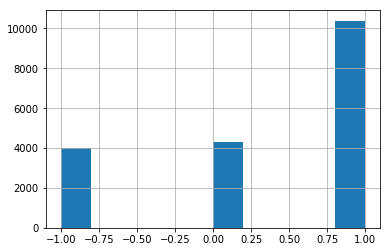

In [120]:
print(sent.Sentiment.value_counts())
sent.Sentiment.hist(); 

In [121]:
#Apply length function to the review column
lengths = sent.Post.apply(len)

print('Average character length of the posts are:')
print (np.mean(lengths))

Average character length of the posts are:
500.9383645783261


In [122]:
import nltk
#nltk.download()

In [123]:
from nltk.tokenize import sent_tokenize
from nltk.stem import PorterStemmer
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

eng = stopwords.words('English')

In [124]:
def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return 'n'

In [125]:
def post_cleaner(post):
    
    #1. Use regex to find emoticons
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', post)
    
    #2. Remove punctuation
    post = re.sub("[^a-zA-Z]", " ",post)
    
    #3. Tokenize into words (all lower case)
    post = post.lower().split()
    
    #4. Remove stopwords
    eng_stopwords = set(stopwords.words("english"))
    post = [w for w in post if not w in eng_stopwords]
    
    #5. Join the review to one sentence
    post = ' '.join(post+emoticons)
    # add emoticons to the end

    return(post)

In [126]:
%%time

num_posts = len(sent['Post'])

post_clean_original = []

for i in range(0,num_posts):
    if( (i+1)%500 == 0 ):
        # print progress
        print("Done with %d posts" %(i+1)) 
    post_clean_original.append(post_cleaner(record['Post'][i]))

Done with 500 posts
Done with 1000 posts
Done with 1500 posts
Done with 2000 posts
Done with 2500 posts
Done with 3000 posts
Done with 3500 posts
Done with 4000 posts
Done with 4500 posts
Done with 5000 posts
Done with 5500 posts
Done with 6000 posts
Done with 6500 posts
Done with 7000 posts
Done with 7500 posts
Done with 8000 posts
Done with 8500 posts
Done with 9000 posts
Done with 9500 posts
Done with 10000 posts
Done with 10500 posts
Done with 11000 posts
Done with 11500 posts
Done with 12000 posts
Done with 12500 posts
Done with 13000 posts
Done with 13500 posts
Done with 14000 posts
Done with 14500 posts
Done with 15000 posts
Done with 15500 posts
Done with 16000 posts
Done with 16500 posts
Done with 17000 posts
Done with 17500 posts
Done with 18000 posts
Done with 18500 posts
CPU times: user 4.08 s, sys: 649 ms, total: 4.73 s
Wall time: 4.77 s


In [127]:
%%time
# Lemmatizer

post_clean_wnl = []

wnl = WordNetLemmatizer()

for i in range(0,num_posts):
    if( (i+1)%500 == 0 ):
        # print progress
        print("Done with %d posts" %(i+1)) 
    
    wnl_stems = []
    token_tag = pos_tag(post_clean_original[i].split())
    for pair in token_tag:
        res = wnl.lemmatize(pair[0],pos=get_wordnet_pos(pair[1]))
        wnl_stems.append(res)

    post_clean_wnl.append(' '.join(wnl_stems))

Done with 500 posts
Done with 1000 posts
Done with 1500 posts
Done with 2000 posts
Done with 2500 posts
Done with 3000 posts
Done with 3500 posts
Done with 4000 posts
Done with 4500 posts
Done with 5000 posts
Done with 5500 posts
Done with 6000 posts
Done with 6500 posts
Done with 7000 posts
Done with 7500 posts
Done with 8000 posts
Done with 8500 posts
Done with 9000 posts
Done with 9500 posts
Done with 10000 posts
Done with 10500 posts
Done with 11000 posts
Done with 11500 posts
Done with 12000 posts
Done with 12500 posts
Done with 13000 posts
Done with 13500 posts
Done with 14000 posts
Done with 14500 posts
Done with 15000 posts
Done with 15500 posts
Done with 16000 posts
Done with 16500 posts
Done with 17000 posts
Done with 17500 posts
Done with 18000 posts
Done with 18500 posts
CPU times: user 50.1 s, sys: 826 ms, total: 50.9 s
Wall time: 52.2 s


In [140]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn import metrics
# from sklearn.model_selection import train_test_split

# # put everything together in a function

# def predict_sentiment(cleaned_posts, y=sent["Sentiment"]):

#     print("Creating the bag of words model..\n")
#     # CountVectorizer" is scikit-learn's bag of words tool, here we show more keywords 
#     vectorizer = CountVectorizer(analyzer = "word",   \
#                                  tokenizer = None,    \
#                                  preprocessor = None, \
#                                  stop_words = None,   \
#                                  max_features = 2000) 
    
#     X_train, X_test, y_train, y_test = train_test_split(\
#     cleaned_posts, y, random_state=0, test_size=0.2)

#     # Then we use fit_transform() to fit the model / learn the vocabulary,
#     # then transform the data into feature vectors.
#     # The input should be a list of strings. .toarraty() converts to a numpy array
    
#     train_bag = vectorizer.fit_transform(X_train).toarray()
#     test_bag = vectorizer.transform(X_test).toarray()

#     # You can extract the vocabulary created by CountVectorizer
#     # by running print(vectorizer.get_feature_names())


#     print("Training the random forest classifier..\n")
#     # Initialize a Random Forest classifier with 75 trees
#     forest = RandomForestClassifier(n_estimators = 50) 

#     # Fit the forest to the training set, using the bag of words as 
#     # features and the sentiment labels as the target variable
#     forest = forest.fit(train_bag, y_train)


#     train_predictions = forest.predict(train_bag)
#     test_predictions = forest.predict(test_bag)
    
#     train_acc = metrics.accuracy_score(y_train, train_predictions)
#     valid_acc = metrics.accuracy_score(y_test, test_predictions)
#     print("The training accuracy is: ", train_acc, "\n", "The validation accuracy is: ", valid_acc)
#     print()
#     print()
#     s = pd.DataFrame(pd.Series(test_predictions))
#     return s
#     print()
#     print()
#     #Extract feature importnace
#     print('TOP TEN IMPORTANT FEATURES:')
#     importances = forest.feature_importances_
#     indices = np.argsort(importances)[::-1]
#     top_10 = indices[:10]
#     print([vectorizer.get_feature_names()[ind] for ind in top_10])

In [163]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split

# put everything together in a function

def predict_sentiment(cleaned_posts, y=sent["Sentiment"]):
    print("Creating the bag of words model..\n")
    # CountVectorizer" is scikit-learn's bag of words tool, here we show more keywords 
    vectorizer = CountVectorizer(analyzer = "word",   \
                                 tokenizer = None,    \
                                 preprocessor = None, \
                                 stop_words = None,   \
                                 max_features = 2000) 
    
    X_train = cleaned_posts[6784:18723]
    X_test = cleaned_posts[0:6784]
    y_train = y[6784:18723]
    y_test = y[0:6784]

    # Then we use fit_transform() to fit the model / learn the vocabulary,
    # then transform the data into feature vectors.
    # The input should be a list of strings. .toarraty() converts to a numpy array
    
    train_bag = vectorizer.fit_transform(X_train).toarray()
    test_bag = vectorizer.transform(X_test).toarray()

    # You can extract the vocabulary created by CountVectorizer
    # by running print(vectorizer.get_feature_names())


    print("Training the random forest classifier..\n")
    # Initialize a Random Forest classifier with 75 trees
    forest = RandomForestClassifier(n_estimators = 50) 

    # Fit the forest to the training set, using the bag of words as 
    # features and the sentiment labels as the target variable
    forest = forest.fit(train_bag, y_train)


    train_predictions = forest.predict(train_bag)
    test_predictions = forest.predict(test_bag)
    
    train_acc = metrics.accuracy_score(y_train, train_predictions)
    valid_acc = metrics.accuracy_score(y_test, test_predictions)
    print("The training accuracy is: ", train_acc, "\n", "The validation accuracy is: ", valid_acc)
    print()
    print()
    s = pd.DataFrame(pd.Series(test_predictions))
    return s
    print()
    print()
    #Extract feature importnace
    print('TOP TEN IMPORTANT FEATURES:')
    importances = forest.feature_importances_
    indices = np.argsort(importances)[::-1]
    top_10 = indices[:10]
    print([vectorizer.get_feature_names()[ind] for ind in top_10])

In [164]:
s = predict_sentiment(post_clean_original) #Accuracy measure with original sentences

Creating the bag of words model..

Training the random forest classifier..

The training accuracy is:  0.996230840104 
 The validation accuracy is:  0.564121462264




In [173]:
type(s[0])

pandas.core.series.Series

In [174]:
test_date = sent['Date'][0:6784]

In [175]:
model = pd.concat([test_date,s[0]],axis=1)

In [177]:
model.head()

,Date,0
0,2017-12-03,1
1,2017-12-03,-1
2,2017-12-03,1
3,2017-12-03,1
4,2017-12-03,1


In [179]:
model.to_csv('model', sep='\t', encoding='utf-8')

In [130]:
predict_sentiment(post_clean_wnl) #Lemmatized sentences lead to lower accuracy

Creating the bag of words model..

Training the random forest classifier..

The training accuracy is:  0.997129122713 
 The validation accuracy is:  0.62349799733


TOP TEN IMPORTANT FEATURES:
['bitcoin', 'smart', 'money', 'invest', 'think', 'investment', 'good', 'risky', 'people', 'need']
